### Read the .csv file

In [24]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd
df = pd.read_csv('Student Performance.csv')

### KNN Model 1

<img src="Model 1.jpg" width=500 height=500 />

### Obtain the feature matrix and label

In [25]:
# convert these data into 2D numpy array
# order: math percentage, reading score percentage, writing score percentage
X = np.array([[df['math percentage'][0], 
              df['reading score percentage'][0], 
              df['writing score percentage'][0]]], 
             dtype = 'float')
for i in range(1,1000):
    X = np.append(X, [[df['math percentage'][i], 
                  df['reading score percentage'][i], 
                  df['writing score percentage'][i]]],axis=0)
print('feature matrix')
print(X)
print('size: ' + str(X.shape))
print()

# Group A to Group E labeled as 0,1,2,3,4
if(df['race/ethnicity'][0] == 'group A'):
    first_elem = 0
elif(df['race/ethnicity'][0] == 'group B'):
    first_elem = 1
elif(df['race/ethnicity'][0] == 'group C'):
    first_elem = 2
elif(df['race/ethnicity'][0] == 'group D'):
    first_elem = 3
else:
    first_elem = 4
    
y = np.array([first_elem], dtype = 'int')
for i in range(1,1000):
    if(df['race/ethnicity'][i] == 'group A'):
        y = np.append(y, 0)
    elif(df['race/ethnicity'][i] == 'group B'):
        y = np.append(y, 1)
    elif(df['race/ethnicity'][i] == 'group C'):
        y = np.append(y, 2)
    elif(df['race/ethnicity'][i] == 'group D'):
        y = np.append(y, 3)
    else:
        y = np.append(y, 4)
print('Labels')
print(y)
print('size: ' + str(y.shape))


feature matrix
[[0.72 0.72 0.74]
 [0.69 0.9  0.88]
 [0.9  0.95 0.93]
 ...
 [0.59 0.71 0.65]
 [0.68 0.78 0.77]
 [0.77 0.86 0.86]]
size: (1000, 3)

Labels
[1 2 1 0 2 1 1 1 3 1 2 3 1 0 0 2 2 1 2 2 3 1 3 2 3 0 1 2 2 3 3 1 4 3 4 4 3
 3 3 1 2 2 1 1 4 1 0 2 3 2 4 4 2 3 2 2 4 3 3 2 4 0 0 2 3 1 3 2 1 2 3 3 0 2
 2 1 4 0 3 4 1 1 0 4 3 2 2 3 0 3 2 2 2 2 1 2 1 4 3 3 1 3 3 1 2 2 3 4 1 1 3
 2 0 3 4 2 1 3 3 2 2 1 2 3 4 1 1 3 3 0 3 2 4 2 3 2 1 4 2 3 3 2 4 0 3 2 1 2
 3 4 0 0 1 3 3 2 4 1 1 3 1 4 1 2 4 2 2 1 1 2 0 4 3 2 2 2 1 2 1 3 2 2 4 3 2
 2 4 3 1 2 4 3 1 3 2 3 2 4 1 1 2 3 2 1 2 3 4 4 1 1 3 2 2 2 4 1 4 2 1 1 3 1
 2 3 1 4 2 3 0 2 3 2 1 4 2 3 3 3 1 2 3 4 3 4 3 2 4 1 1 2 0 3 1 3 3 4 2 2 1
 2 2 2 2 4 3 3 2 3 3 4 2 2 3 3 1 2 2 4 2 1 3 3 3 3 1 1 4 1 1 4 2 3 2 4 3 1
 0 4 2 3 0 3 2 1 2 0 4 2 1 3 1 1 3 2 2 2 3 2 1 3 2 4 2 2 2 2 2 0 2 1 2 2 4
 1 2 1 3 2 1 3 2 2 1 3 3 2 1 2 3 4 1 4 2 2 2 1 0 2 3 3 1 1 2 3 2 0 2 2 0 3
 4 2 3 3 3 4 3 3 0 0 1 2 2 4 0 4 4 2 3 3 4 3 4 2 2 0 1 2 1 3 2 0 0 3 2 2 1
 1 3 3 3 4 3 1 2 4 2 2

Using KNN to do the model training

In [26]:
# In the following line, "knn" is instantiated as an "object" of 'KNeighborsClassifier' "class". 
# most of the time we use default k value
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

In [27]:
# We can use the method "fit" of the "object knn" along with training dataset and labels to train the model.
# where:
# X = iris.data  # X will be 'feature matrix'
# y = iris.target  # y will be 'label vector'
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [28]:
# We can use the method "predict" of the *trained* object knn on one or more testing data sample to perform prediction:
# X: feature, Y: label
X_Testing = [[0.72,0.72,0.74]]
y_predict = knn.predict(X_Testing)

print(y_predict)

[1]


In [29]:
# We can use the method "predict" of the *trained* object knn on one or more testing data sample to perform prediction:
# Two new data samples:
# if there are 2 new flowers and want to detect both of them
# [0, 1, 2] => ['setosa' 'versicolor' 'virginica']
X_Testing = [[0.72,0.72,0.74],[0.69,0.9,0.88]]
y_predict = knn.predict(X_Testing)

print(y_predict)

[1 2]


In [30]:
# Randomly splitting the original dataset into training set and testing set
# The function"train_test_split" from "sklearn.cross_validation" library performs random splitting.
# "test_size=0.3" means that pick 30% of data samples for testing set, and the rest (70%) for training set.

from sklearn.model_selection import train_test_split
# where X is all the sample data, y is all the labels
# random_state=1 means only random once and rest stay the same
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) # We can fix the random_state for reproducibility!

In [31]:
# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

(700, 3)
(700,)


In [32]:
# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(300, 3)
(300,)


In [33]:
print(X_test)
print('\n')
print(y_test)

[[0.55 0.41 0.48]
 [0.44 0.54 0.53]
 [0.7  0.64 0.7 ]
 [0.6  0.59 0.54]
 [0.7  0.56 0.51]
 [0.92 0.79 0.84]
 [0.64 0.79 0.77]
 [0.86 0.81 0.75]
 [0.99 0.93 0.9 ]
 [0.78 0.77 0.77]
 [0.73 0.76 0.78]
 [0.33 0.41 0.43]
 [0.69 0.58 0.53]
 [0.65 0.78 0.82]
 [0.45 0.59 0.64]
 [0.59 0.65 0.66]
 [0.97 0.92 0.86]
 [0.57 0.69 0.68]
 [0.81 0.8  0.76]
 [0.63 0.6  0.57]
 [0.54 0.59 0.5 ]
 [0.62 0.67 0.69]
 [0.64 0.66 0.59]
 [0.81 0.72 0.77]
 [0.73 0.76 0.78]
 [0.36 0.29 0.27]
 [0.58 0.61 0.52]
 [0.5  0.48 0.53]
 [0.81 0.88 0.9 ]
 [0.62 0.68 0.68]
 [0.68 0.54 0.53]
 [0.53 0.71 0.67]
 [0.18 0.32 0.28]
 [0.69 0.58 0.57]
 [0.4  0.52 0.43]
 [0.63 0.55 0.63]
 [0.66 0.63 0.64]
 [0.65 0.7  0.71]
 [0.66 0.65 0.6 ]
 [0.61 0.47 0.56]
 [0.43 0.62 0.61]
 [0.5  0.48 0.42]
 [0.82 0.85 0.87]
 [0.6  0.7  0.74]
 [0.87 0.73 0.72]
 [0.82 0.85 0.86]
 [0.88 0.99 0.95]
 [0.64 0.73 0.68]
 [0.69 0.65 0.74]
 [0.66 0.72 0.7 ]
 [0.37 0.45 0.38]
 [0.52 0.57 0.56]
 [0.87 0.84 0.76]
 [0.52 0.7  0.62]
 [0.79 0.73 0.67]
 [0.78 0.8

In [34]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [35]:
# Testing on the testing set:

y_predict = knn.predict(X_test)

print(y_predict)

[0 2 2 2 0 3 3 1 2 4 3 2 0 2 3 2 0 1 3 1 3 1 2 2 3 2 1 0 3 2 1 3 1 2 3 3 3
 3 2 2 2 2 4 3 3 4 2 2 2 4 3 4 1 2 2 3 2 2 1 1 2 2 4 1 1 1 0 3 2 1 2 2 3 2
 2 2 4 3 2 2 3 2 2 3 0 0 1 2 1 3 0 1 1 2 2 4 3 1 1 3 0 3 2 3 0 3 4 3 2 2 0
 1 3 1 3 1 1 3 3 2 2 0 1 0 2 2 2 2 4 3 1 0 1 3 2 3 0 2 2 1 3 2 2 1 2 2 1 3
 3 4 2 2 2 0 1 0 3 1 4 0 4 4 3 4 1 3 3 3 1 1 3 2 2 3 2 1 2 1 0 1 3 2 1 3 1
 1 3 1 4 3 2 1 0 3 2 2 1 3 3 4 3 2 3 1 1 1 2 1 3 4 2 3 2 3 4 4 3 0 0 3 3 2
 0 3 2 0 3 2 1 3 3 3 4 2 3 0 1 1 2 0 3 1 2 1 1 1 3 0 2 3 2 3 4 3 2 2 3 2 3
 1 2 3 3 2 1 2 1 0 2 2 4 3 4 3 4 1 2 2 1 1 2 0 2 4 1 3 1 1 3 2 2 4 4 0 0 2
 3 2 3 3]


In [36]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
# Function "accuracy_score" from "sklearn.metrics" will perform the element-to-element comparision and returns the 
# portion of correct predictions:

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_predict)

print(accuracy)

0.24666666666666667


In [37]:
results = pd.DataFrame()

results['actual'] = y_test 
results['prediction'] = y_predict 

print(results)

     actual  prediction
0         3           0
1         3           2
2         4           2
3         3           2
4         2           0
..      ...         ...
295       1           2
296       4           3
297       4           2
298       2           3
299       2           3

[300 rows x 2 columns]


In [38]:
from sklearn.metrics import accuracy_score
highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

The highest accuracy: 0.38
When k= 60


#### Using Cross Validation on KNN algorithm to see if the model accuary can be improved

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

highest = 0
best_k = 0
for i in range(1,300):
    k = i
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring = 'accuracy')
    accuracy = scores.mean()
    if(highest == 0):
        highest = accuracy
    elif(highest < accuracy):
        highest = accuracy
        best_k = i
    else:
        pass
print("The highest accuracy: " + str(highest))
print("When k= " + str(best_k))

The highest accuracy: 0.33799999999999997
When k= 91


In [40]:
k = 60
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=60)

In [41]:
# Predicting the Binary Label:
y_predict = knn.predict(X_test)

# Estimating the probability (likelihood) of Each Label: 
y_predict_prob = knn.predict_proba(X_test)

In [42]:
# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(y_predict)

# This line prints the "estimated likelihood of both label" for the testing set:
print(y_predict_prob)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(y_predict_prob[:,1])

[3 3 4 3 2 2 2 4 4 2 4 2 2 3 0 1 0 1 4 2 2 0 2 3 2 1 2 2 2 4 1 1 1 3 3 3 4
 3 1 3 2 2 1 1 2 4 4 2 3 1 4 3 4 1 3 3 2 2 2 3 4 3 2 2 4 2 1 4 3 2 1 3 4 3
 2 3 4 2 3 3 3 2 0 1 1 3 3 2 3 0 1 1 2 1 2 4 3 4 4 2 2 1 1 2 2 3 2 3 0 2 2
 3 1 3 1 2 2 3 1 1 2 1 2 2 3 1 2 3 3 4 1 2 0 2 1 2 1 3 0 2 1 3 0 1 3 2 2 0
 4 3 2 2 1 2 3 3 1 3 3 2 4 1 3 4 2 2 2 3 4 1 3 4 2 3 1 4 4 3 2 1 2 3 3 1 0
 4 2 3 2 1 4 1 4 3 1 0 2 0 1 0 3 3 3 0 0 3 3 2 2 2 2 1 2 1 2 4 2 2 2 2 4 1
 2 3 2 3 3 2 1 1 3 4 3 1 0 3 2 3 3 2 3 0 0 2 4 0 3 2 0 1 2 3 1 1 2 4 4 4 2
 4 2 1 1 2 4 3 1 3 2 2 2 0 3 4 2 2 1 4 2 1 2 3 2 3 2 3 1 1 4 1 1 1 2 1 3 1
 4 4 2 2]
[2 2 3 2 2 4 2 3 4 2 3 2 2 2 2 2 2 2 2 2 2 2 3 3 3 1 2 2 2 2 2 2 1 1 2 3 3
 2 3 2 2 2 2 2 4 2 2 2 3 2 2 2 2 2 2 3 2 2 2 2 2 3 2 2 2 3 2 3 2 2 3 2 3 3
 3 3 2 2 2 3 2 3 1 2 2 2 3 2 3 2 3 2 2 3 2 2 3 2 2 2 3 2 2 2 3 2 2 3 3 2 2
 2 2 2 2 2 2 2 2 3 2 2 1 2 3 3 2 2 3 2 2 1 2 2 3 2 3 2 3 2 3 2 2 3 3 2 2 2
 3 2 2 2 2 2 4 2 1 2 2 2 4 2 2 2 2 2 2 3 2 2 3 2 2 2 2 2 4 2 2 2 2 3 2 2 2
 2 2 3 2 3 2 2 

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [43]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob[:,1], pos_label=1)

print(fpr)
print(tpr)

[0.         0.00421941 0.02109705 0.06329114 0.11392405 0.20253165
 0.29957806 0.39240506 0.45991561 0.5443038  0.70042194 0.78059072
 0.89873418 0.96624473 0.98312236 0.99578059 1.        ]
[0.         0.         0.01587302 0.11111111 0.22222222 0.28571429
 0.41269841 0.49206349 0.58730159 0.71428571 0.79365079 0.82539683
 0.95238095 1.         1.         1.         1.        ]


# AUC:

In [44]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.5882727211841136


# ROC Curve:

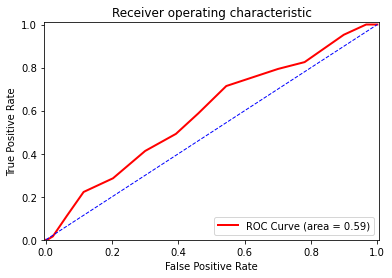

In [45]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Conclusion
### KNN model accuracy: 0.34 when k=91 with Cross Validation
### KNN model accuracy: 0.38 when k=60 without Cross Validation